# Statistics 101 - Exercise

In [ ]:
install.packages("dplyr")
install.packages("Hmisc")
library(dplyr)
library(car)
library(Hmisc)
#install.packages("MESS")
library(MESS)

In [ ]:
## change the size of the graphs
options(repr.plot.width = 3, repr.plot.height = 3)

In [59]:
## Data
fuel <- read.csv(file="C:/Users/dalit/DataScience/data/car_fuel_comsumption.csv")
head(fuel)

car,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill.liters
1,28.0,5.0,26,21.5,12,,E10,0,0,0,45
2,12.0,4.2,30,21.5,13,,E10,0,0,0,NA
3,11.2,5.5,38,21.5,15,,E10,0,0,0,NA
4,12.9,3.9,36,21.5,14,,E10,0,0,0,NA
5,18.5,4.5,46,21.5,15,,E10,0,0,0,NA
6,8.3,6.4,50,21.5,10,,E10,0,0,0,NA


## Summary variables

In [23]:
### get out outliers
summary(fuel)

      car         distance        consume          speed        temp_inside   
 Min.   :  1   Min.   : 2.00   Min.   :3.300   Min.   :16.00   Min.   :19.00  
 1st Qu.: 91   1st Qu.:11.80   1st Qu.:4.300   1st Qu.:33.00   1st Qu.:21.50  
 Median :181   Median :14.30   Median :4.700   Median :40.00   Median :22.00  
 Mean   :181   Mean   :16.38   Mean   :4.779   Mean   :41.01   Mean   :21.93  
 3rd Qu.:271   3rd Qu.:18.40   3rd Qu.:5.200   3rd Qu.:49.00   3rd Qu.:22.50  
 Max.   :361   Max.   :48.60   Max.   :6.900   Max.   :80.00   Max.   :25.50  
                                                               NA's   :12     
  temp_outside      specials   gas_type         AC               rain       
 Min.   :-5.00          :275   E10 :145   Min.   :0.00000   Min.   :0.0000  
 1st Qu.: 7.00   rain   : 30   SP98:216   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :10.00   sun    : 26              Median :0.00000   Median :0.0000  
 Mean   :11.41   AC rain:  8              Mean   :0.07202   

Some variables are categorical (like AC, rain, sun) but are represented as numerical. We convert them to factors

In [24]:
fuel$car <- NULL
fuel$AC <- factor(fuel$AC)
fuel$rain <- factor(fuel$rain)
fuel$sun <- factor(fuel$sun)
summary(fuel)

    distance        consume          speed        temp_inside   
 Min.   : 2.00   Min.   :3.300   Min.   :16.00   Min.   :19.00  
 1st Qu.:11.80   1st Qu.:4.300   1st Qu.:33.00   1st Qu.:21.50  
 Median :14.30   Median :4.700   Median :40.00   Median :22.00  
 Mean   :16.38   Mean   :4.779   Mean   :41.01   Mean   :21.93  
 3rd Qu.:18.40   3rd Qu.:5.200   3rd Qu.:49.00   3rd Qu.:22.50  
 Max.   :48.60   Max.   :6.900   Max.   :80.00   Max.   :25.50  
                                                 NA's   :12     
  temp_outside      specials   gas_type   AC      rain    sun    
 Min.   :-5.00          :275   E10 :145   0:335   0:318   0:331  
 1st Qu.: 7.00   rain   : 30   SP98:216   1: 26   1: 43   1: 30  
 Median :10.00   sun    : 26                                     
 Mean   :11.41   AC rain:  8                                     
 3rd Qu.:16.00   ac     :  7                                     
 Max.   :31.00   AC     :  6                                     
                 (

## Relationship analysis
 
Lets plot the variables an check their relationships:

In [103]:
### a better representation of pairs
options(repr.plot.width = 6, repr.plot.height = 6)

pairs(fuel, 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)


ERROR: Error in pairs.default(fuel, upper.panel = panel.smooth, diag.panel = panel.hist, : object 'panel.hist' not found


Now we will check for interactions between the dependent variable and the rest of the variables:

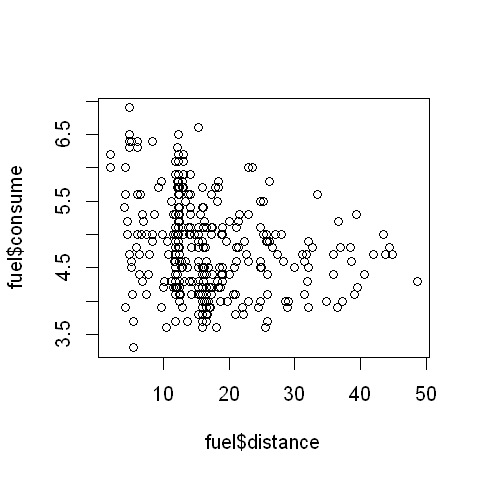

In [104]:
options(repr.plot.width = 4, repr.plot.height = 4)
## consume vs distance
plot(fuel$consume ~ fuel$distance)


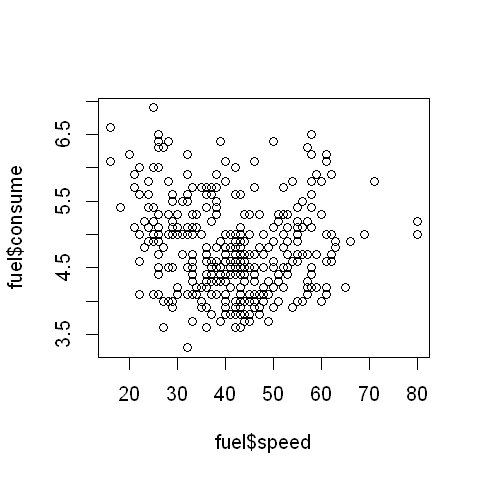

In [62]:
## consume vs speed
plot(fuel$consume ~ fuel$speed)


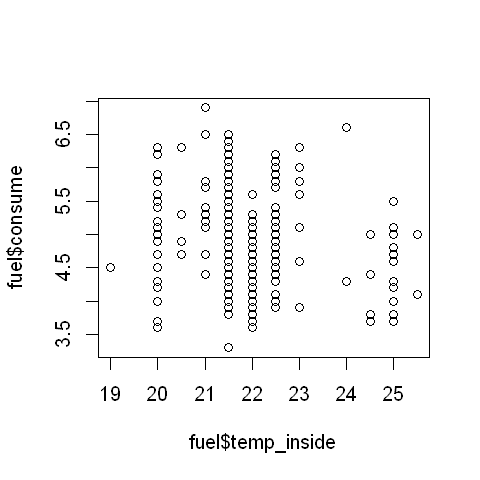

In [63]:
## consume vs temperature inside

plot(fuel$consume ~ fuel$temp_inside)


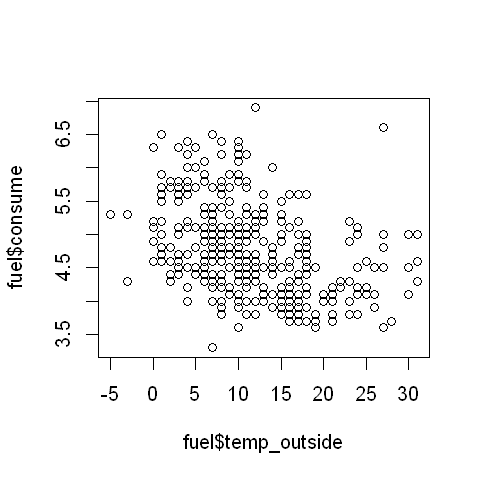

In [64]:
## consume vs temperature outside
plot(fuel$consume ~ fuel$temp_outside)

Now we plot the categorical variables:

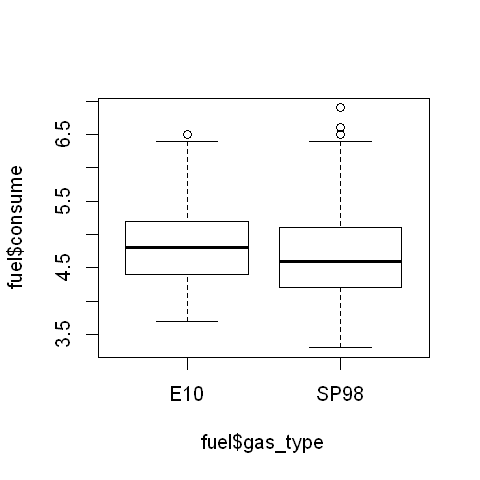

In [71]:
## consume vs gas type
plot(fuel$consume ~ fuel$gas_type)

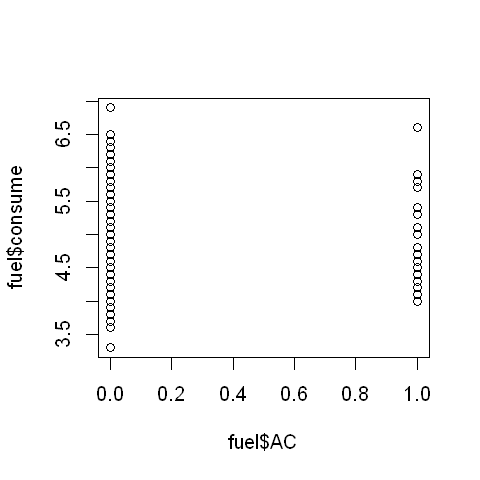

In [69]:
## consume vs air conditioning
plot(fuel$consume ~ fuel$AC)

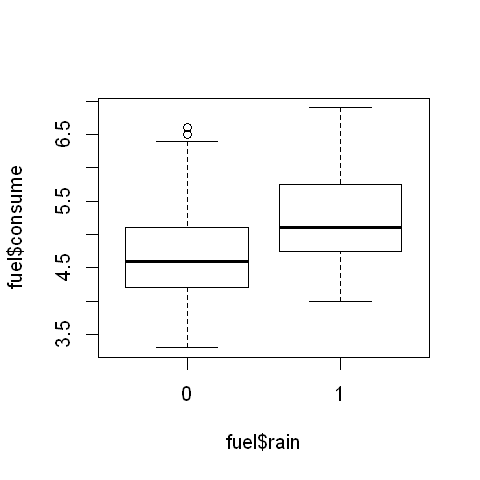

In [41]:
## consume vs rain
plot(fuel$consume ~ fuel$rain)

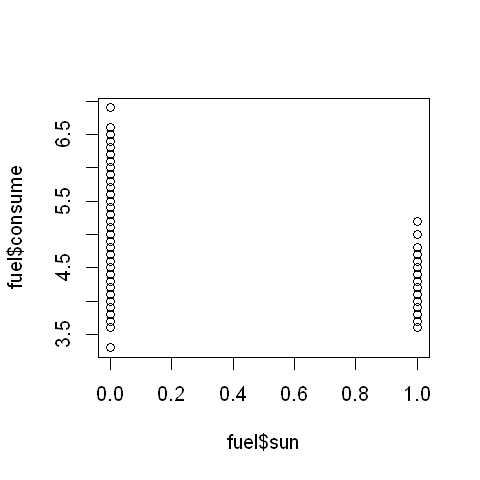

In [72]:
## consume vs sun
plot(fuel$consume ~ fuel$sun)

Now lets check the correlations between the numeric variables. We will use a correlation matrix from the Hmisc package.

In [81]:
#install.packages("corrplot")
library(corrplot)
vars <- c("consume","distance","speed","temp_inside")
res1 <- rcorr(as.matrix(fuel[,vars]), type="pearson")
res1


ERROR: Error in corr(as.matrix(fuel[, vars]), type = "pearson"): could not find function "corr"


In [75]:
## gas_type is a character variable and thus can not be entered as is. 
## We create a copy of the variable and convert it to numeric (1/2)
fuel$gastype <- as.numeric(fuel$gas_type)
vars <- c("consume","gastype","AC","rain","sun")

res2 <- rcorr(as.matrix(fuel[,vars]),type="spearman")
res2


ERROR: Error in rcorr(as.matrix(fuel[, vars]), type = "spearman"): could not find function "rcorr"


## Difference analysis
 
We will check if there are differences on our dependent variable (consume) among the different categorical variables  


	Two Sample t-test

data:  fuel$consume by fuel$gas_type
t = 1.0909, df = 359, p-value = 0.2761
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06488402  0.22653791
sample estimates:
 mean in group E10 mean in group SP98 
          4.827586           4.746759 


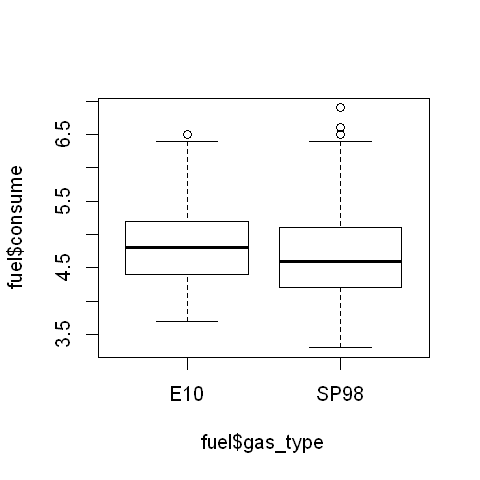

In [82]:
## Consume vs gas type:
boxplot(fuel$consume ~ fuel$gas_type)
t.test(fuel$consume ~ fuel$gas_type,var.equal = T,paired = F)


	Two Sample t-test

data:  fuel$consume by fuel$AC
t = -0.42424, df = 359, p-value = 0.6716
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3363866  0.2170066
sample estimates:
mean in group 0 mean in group 1 
       4.774925        4.834615 


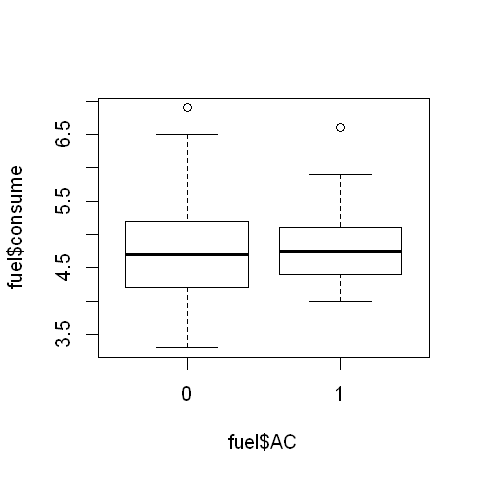

In [83]:
## Consume vs air conditioning:
boxplot(fuel$consume ~ fuel$AC)
t.test(fuel$consume ~ fuel$AC,var.equal = T,paired = F)


	Two Sample t-test

data:  fuel$consume by fuel$rain
t = -4.8768, df = 359, p-value = 1.623e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7443906 -0.3165571
sample estimates:
mean in group 0 mean in group 1 
       4.716038        5.246512 


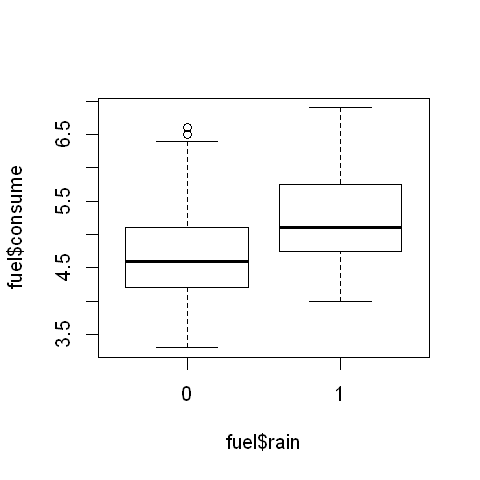

In [84]:
## Consume vs rain:
boxplot(fuel$consume ~ fuel$rain)
t.test(fuel$consume ~ fuel$rain,var.equal = T,paired = F)


	Two Sample t-test

data:  fuel$consume by fuel$sun
t = 4.2624, df = 359, p-value = 2.588e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2952195 0.8009940
sample estimates:
mean in group 0 mean in group 1 
       4.824773        4.276667 


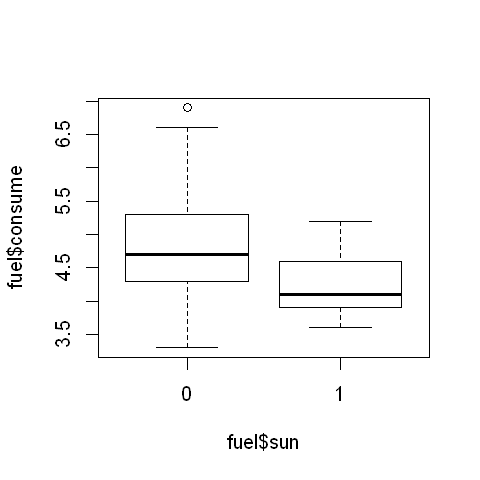

In [85]:
## Consume vs sun:
boxplot(fuel$consume ~ fuel$sun)
t.test(fuel$consume ~ fuel$sun,var.equal = T,paired = F)

## Linear Model

In [86]:
vars <-c("consume","distance","speed","temp_inside","gas_type","AC","rain","sun")
mod <- lm(consume ~. ,data=fuel[,vars])
summary(mod)


Call:
lm(formula = consume ~ ., data = fuel[, vars])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67251 -0.45976 -0.04539  0.40226  1.87488 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.059179   0.801517   8.807  < 2e-16 ***
distance     -0.018399   0.004407  -4.175 3.79e-05 ***
speed        -0.003682   0.003159  -1.166  0.24455    
temp_inside  -0.080806   0.036333  -2.224  0.02680 *  
gas_typeSP98 -0.132171   0.069667  -1.897  0.05865 .  
AC            0.077867   0.140444   0.554  0.57965    
rain          0.490098   0.107486   4.560 7.15e-06 ***
sun          -0.385691   0.127595  -3.023  0.00269 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.632 on 341 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.178,	Adjusted R-squared:  0.1611 
F-statistic: 10.55 on 7 and 341 DF,  p-value: 5.132e-12


In [87]:
vif(mod)

ERROR: Error in vif(mod): could not find function "vif"


In [88]:
vars <-c("consume","distance","temp_inside","rain","sun")
mod2 <- lm(consume ~. ,data=fuel[,vars])
summary(mod2)


Call:
lm(formula = consume ~ ., data = fuel[, vars])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71362 -0.47117  0.00148  0.43303  1.97211 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.754972   0.757536   8.917  < 2e-16 ***
distance    -0.019763   0.004132  -4.783 2.56e-06 ***
temp_inside -0.076029   0.034497  -2.204  0.02819 *  
rain         0.485229   0.104934   4.624 5.33e-06 ***
sun         -0.399479   0.127756  -3.127  0.00192 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6338 on 344 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.166,	Adjusted R-squared:  0.1563 
F-statistic: 17.12 on 4 and 344 DF,  p-value: 8.088e-13


To compare two models, we can use two different statistics: Akaike Information criterion (AIC) or the Bayesian Information criterion (BIC). Most of the time both are comparable. The best model is the one with the lower AIC or BIC.

In [90]:
c(AIC(mod), AIC(mod2))


[1] 680.0741 679.1142

In [91]:
c(BIC(mod), BIC(mod2))

[1] 714.7698 702.2446

The AIC and BIC indicate that the best model is the second, even that the R-square for the second model is lower than the one. 
 
We will now plot the data vs the prediction of the model

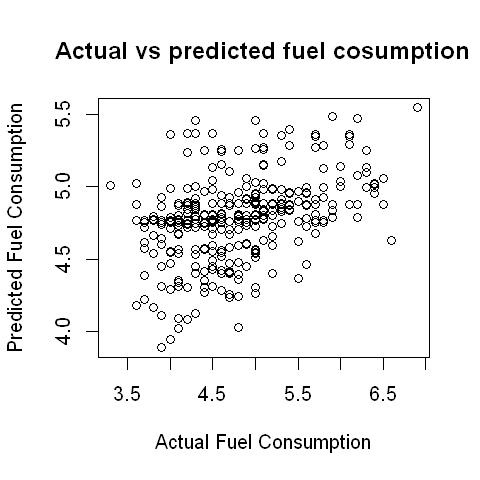

In [92]:
fuel$pred <- predict(mod2, newdata=fuel)

plot(fuel$pred ~ fuel$consume, main="Actual vs predicted fuel cosumption", 
     xlab="Actual Fuel Consumption", ylab="Predicted Fuel Consumption")

## Monte Carlo simulation
 
Lets say we want to calculate the effect of different distances on consumption of car 1. For this, we will use the linear model we created to calculate the consumption. We also will leave constant all the other variables in the data. We will run the Monte Carlo simulation 1000 times by sampling each time a different value form the distances of the whole dataset...

In [96]:

fuel <- read_csv(file="C:/Users/dalit/DataScience/data/car_fuel_comsumption.csv")


ERROR: Error in read_csv(file = "C:/Users/dalit/DataScience/data/car_fuel_comsumption.csv"): could not find function "read_csv"


In [97]:
## set y to zero
y <- rep(0,1000)
d <- rep(0,1000)
y

d

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0

In [98]:
# get the base variables for car 1
car1 <- fuel[1,c("temp_inside","rain","sun")]
car1

temp_inside,rain,sun
21.5,0,0


In [99]:
# now we will run the simulation
for (i in 1:1000) {
  set.seed(i)
  distance <- sample(x=fuel$distance,size=1)
  x <- cbind(distance,car1)
  d[i] <- distance
  y[i] <- predict(mod2,newdata=x)
}


In [100]:

head(y)
summary(y)
paste("sd = ",sd(y))
summary(d)

[1] 4.802152 4.815986 4.485937 4.432576 4.792270 4.792270

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.160   4.778   4.844   4.804   4.887   5.081 

[1] "sd =  0.156055699027539"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   11.80   14.00   16.03   17.30   48.60 

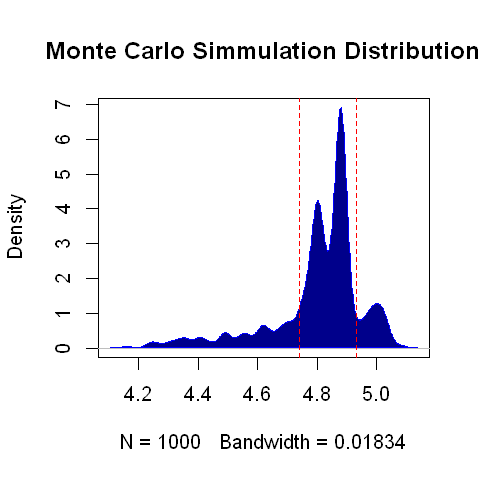

In [101]:
d <- density(y,na.rm = T)
plot(d, main="Monte Carlo Simmulation Distribution")
polygon(d, col="darkblue", border="blue")
abline(v=c(4.74,4.93), col="red",lty=2)


We can say that most of the time, the consumption of car number one will be between 4.74 and 4.93